In [6]:
import bottleneck as bn
import matplotlib
import matplotlib.dates as mdates
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scienceplots
import scipy
import scipy.signal
import scipy.special
import scipy.stats
import sklearn.decomposition
import astropy.io
import datetime
import astropy.time
import pandas as pd

from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

figsize_short = (8, 4)
figsize_normal = (8, 6)
figsize_tall = (8, 8)
plt.rcParams['figure.figsize'] = figsize_short
plt.rcParams['axes.labelpad'] = 6.0
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['legend.edgecolor'] = 'none'


title_font = {'fontsize': 16, 'weight': 'bold', 'style': 'italic'}
path_effect = [pe.withStroke(linewidth=2.0, foreground="k")]

read_path = 'docs/Data/'
save_path = 'docs/Figure/'

perula_df = pd.read_csv(read_path + 'matlab_perula.txt', header = None, sep = '\s+')
matlab_perula = matplotlib.colors.LinearSegmentedColormap.from_list('matlab_perula', np.array(perula_df))

jet_df = pd.read_csv(read_path + 'matlab_jet.txt', header = None, sep = '\s+')
matlab_jet = matplotlib.colors.LinearSegmentedColormap.from_list('matlab_jet', np.array(jet_df))

%matplotlib ipympl

<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_28064\3118345031.py:41: SyntaxWarning: invalid escape sequence '\s'
  perula_df = pd.read_csv(read_path + 'matlab_perula.txt', header = None, sep = '\s+')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_28064\3118345031.py:44: SyntaxWarning: invalid escape sequence '\s'
  jet_df = pd.read_csv(read_path + 'matlab_jet.txt', header = None, sep = '\s+')


C:\Users\Administrator\AppData\Local\Temp\ipykernel_28064\289567705.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(frameon = False, bbox_to_anchor = (0.9, 1.1), loc = 'upper center')


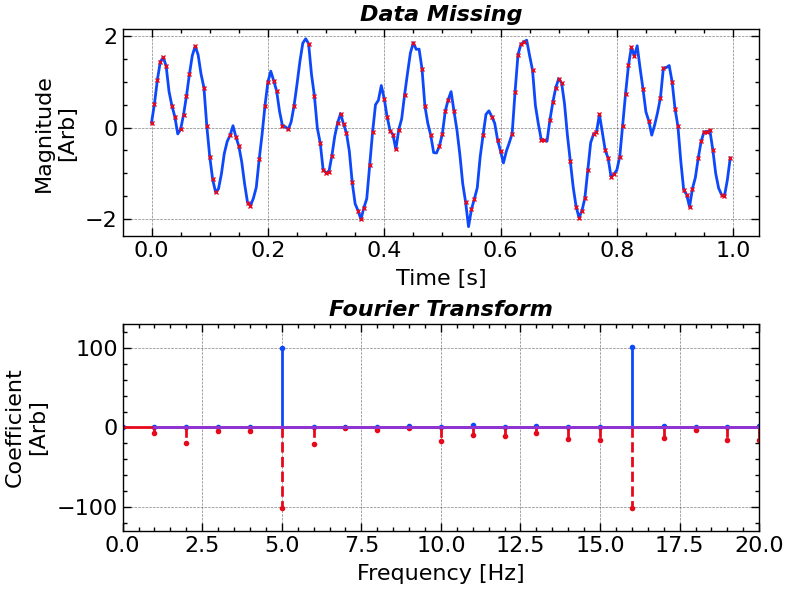

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

%matplotlib ipympl
plt.close()

plt.figure(figsize=figsize_normal)
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

omega0 = 2 * np.pi * 5.0

t = np.linspace(0, 1, 200, endpoint=False)
fs = 1 / (t[1] - t[0])
sig = np.sin(omega0 * t) + np.sin(omega0 * 3.2 * t) + np.random.randn(t.size) * 0.1

ax1.plot(t, sig, '-', alpha = 1.)

coefs = np.fft.rfft(sig)
freq = np.fft.rfftfreq(len(t), t[1] - t[0])

ax2.stem(freq, np.abs(coefs), linefmt = '', markerfmt = 'o', basefmt = '-')

data_miss_idx = np.random.randint(0, 200, 100)
# ax1.plot(time[data_miss_idx], signal[data_miss_idx], 'kx', fillstyle = 'none')

sig[data_miss_idx] = np.nan

ax1.plot(t, sig, 'C1x')

ls_amp = np.abs(scipy.signal.lombscargle(t[~np.isnan(sig)], sig[~np.isnan(sig)], 2 * np.pi * freq[1:], normalize='amplitude'))

ax2.stem(freq[1:], -ls_amp * freq.size, 'C1--', label = 'Lomb-Scargle')

t = np.random.uniform(0, 1, 100)
t.sort()
sig = np.sin(omega0 * t) + np.sin(omega0 * 3.2 * t) + np.random.randn(t.size) * 0.1
# ax3.plot(t, sig, 'C1x')


ls_amp = np.abs(scipy.signal.lombscargle(t[~np.isnan(sig)], sig[~np.isnan(sig)], 2 * np.pi * freq[1:], normalize='amplitude'))

# ax4.stem(freq[1:], -ls_amp * freq.size, 'C1--', label = 'Lomb-Scargle')


ax1.set_title('Data Missing', **title_font)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Magnitude\n[Arb]')


ax2.set_title('Fourier Transform', **title_font)
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Coefficient\n[Arb]')

ax2.set_xlim(0, 20)
ax2.set_ylim(-130, 130)

ax1.legend(frameon = False, bbox_to_anchor = (0.9, 1.1), loc = 'upper center')

plt.tight_layout()


plt.savefig(save_path + 'figure_lombscargle_data_missing' + '.png',bbox_inches='tight',dpi=300)

plt.show()